In [21]:
import pandas as pd
import matplotlib.pyplot as plt

renewables_df = pd.read_csv('renewable-share-energy.csv')
co2_df = pd.read_csv('consumption-co2-per-capita.csv')

In [22]:
# Countries that have data in 1990 and 2020 in both datasets
renewables_1990 = renewables_df[renewables_df['Year'] == 1990]['Entity']
co2_1990 = co2_df[co2_df['Year'] == 1990]['Entity']

renewables_2020 = renewables_df[renewables_df['Year'] == 2020]['Entity']
co2_2020 = co2_df[co2_df['Year'] == 2020]['Entity']

countries_1990 = set(renewables_1990).intersection(co2_1990)
countries_2020 = set(renewables_2020).intersection(co2_2020)

countries_both_years = countries_1990.intersection(countries_2020)

non_country_entities = [
    'High-income countries', 'South America', 'Europe', 'Oceania', 'Africa',
    'Lower-middle-income countries', 'Upper-middle-income countries', 'World',
    'North America', 'European Union (27)', 'Asia'
]

filtered_countries = set(countries_both_years) - set(non_country_entities)

sorted_filtered_countries = sorted(filtered_countries)

# print(sorted_filtered_countries)

In [23]:
# Filter datasets to only include the countries in 'sorted_filtered_countries'
filtered_renewables_df = renewables_df[renewables_df['Entity'].isin(sorted_filtered_countries)]
filtered_co2_df = co2_df[co2_df['Entity'].isin(sorted_filtered_countries)]

In [24]:
# Filter the 'renewables_df' for years 1990 to 2020
renewables_df_1990_2020 = filtered_renewables_df[(filtered_renewables_df['Year'] >= 1990) & (filtered_renewables_df['Year'] <= 2020)]
average_renewables_by_year = renewables_df_1990_2020.groupby('Year')['Renewables (% equivalent primary energy)'].mean().tolist()

# Filter the 'co2_df' for years 1990 to 2020
co2_df_1990_2020 = filtered_co2_df[(filtered_co2_df['Year'] >= 1990) & (filtered_co2_df['Year'] <= 2020)]
average_co2_by_year = co2_df_1990_2020.groupby('Year')['Per capita consumption-based CO₂ emissions'].mean().tolist()

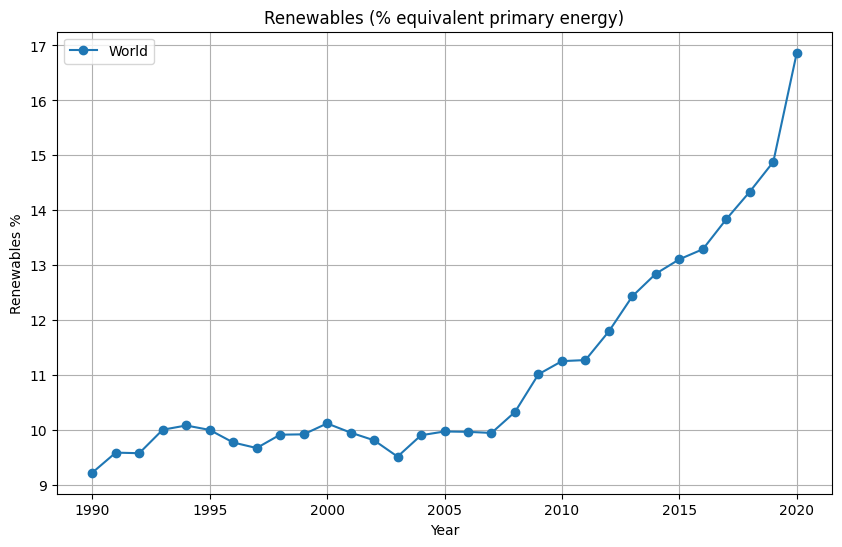

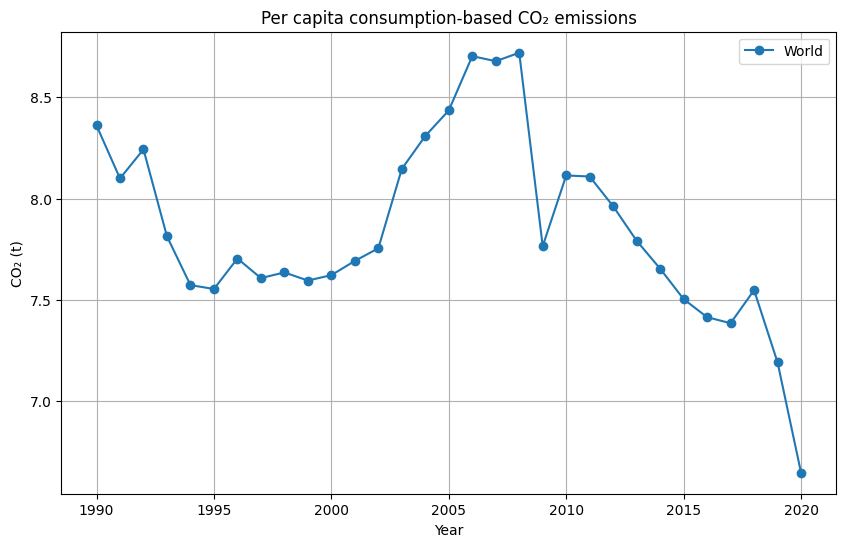

In [25]:
years = range(1990, 2021)

def plot_renewable(years, renewable_list, label):
    plt.figure(figsize=(10, 6))
    plt.plot(years, renewable_list, marker='o', label=label)
    plt.title('Renewables (% equivalent primary energy)')
    plt.xlabel('Year')
    plt.ylabel('Renewables %')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_co2(years, co2_list, label):
    plt.figure(figsize=(10, 6))
    plt.plot(years, co2_list, marker='o', label=label)
    plt.title('Per capita consumption-based CO₂ emissions')
    plt.xlabel('Year')
    plt.ylabel('CO₂ (t)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_renewable(years, average_renewables_by_year, 'World')
plot_co2(years, average_co2_by_year, 'World')

In [26]:
years = range(1990, 2021)

def plot_renewable_and_co2(years, renewable_list, co2_list, selection):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(years, renewable_list, marker='o', color='tab:blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Renewables (% equivalent primary energy)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)
    
    ax2 = ax1.twinx()  
    ax2.plot(years, co2_list, marker='o', color='tab:green')
    ax2.set_ylabel('Per capita consumption-based CO₂ emissions (t)', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(f'Renewables and CO₂ Emissions Over Time ({selection})')

    plt.show()

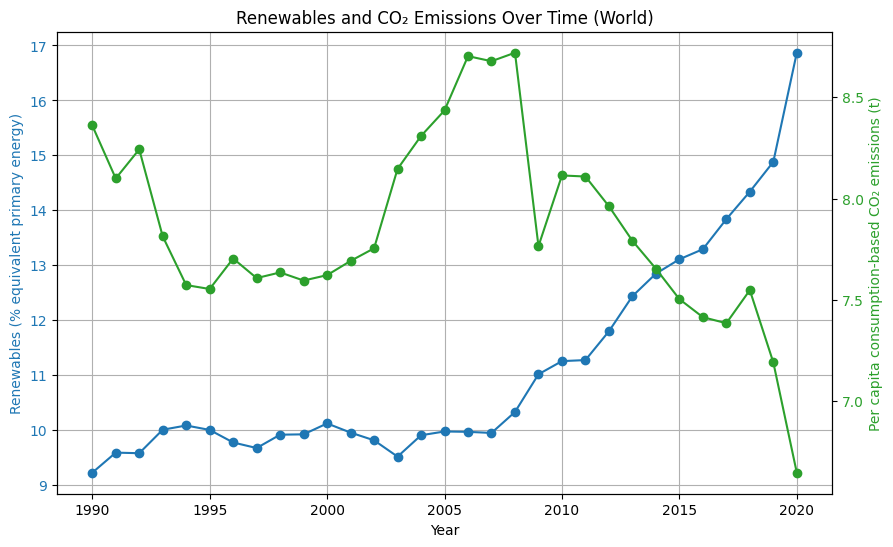

In [27]:
# Plot for world
plot_renewable_and_co2(years, average_renewables_by_year, average_co2_by_year, 'World')

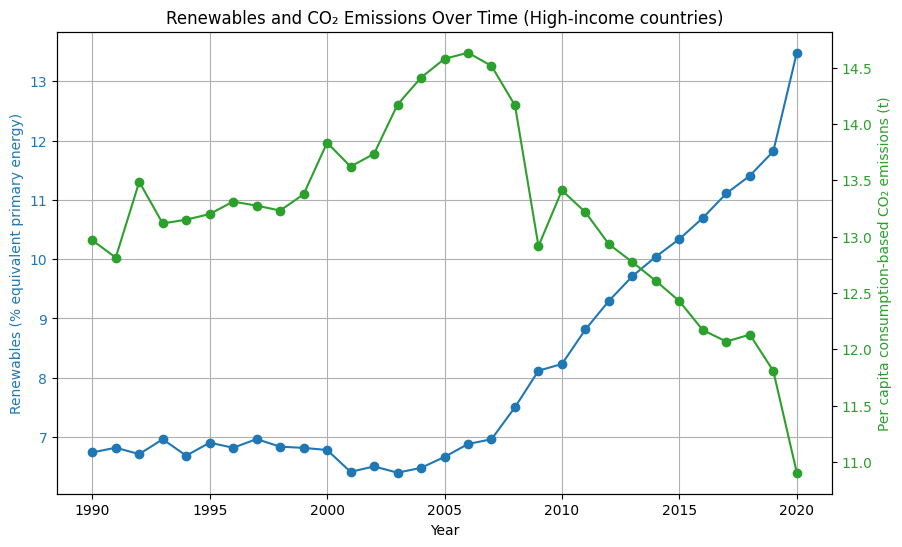

In [28]:
# Plot for high income countries
renewables_high_income = renewables_df[(renewables_df['Entity'] == 'High-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_high_income = co2_df[(co2_df['Entity'] == 'High-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_high_income, co2_high_income, 'High-income countries')

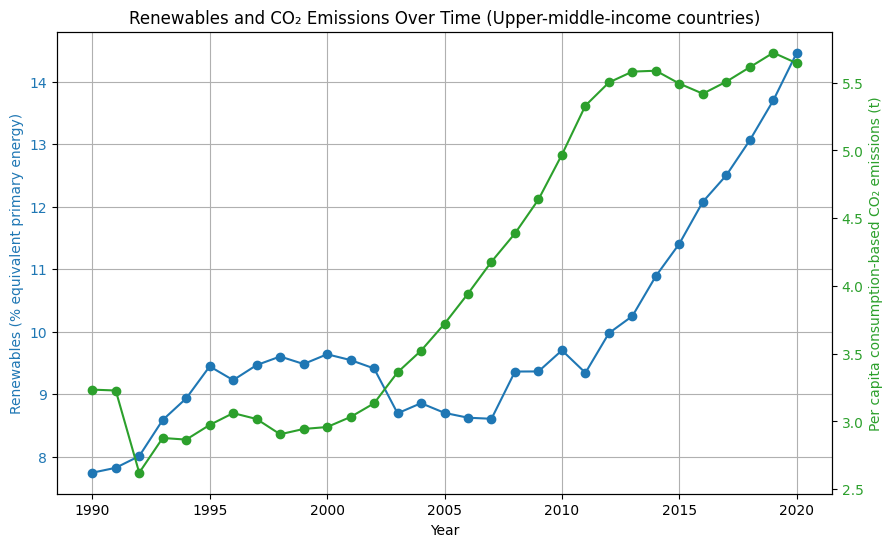

In [29]:
# Plot for upper middle income countries
renewables_upper_midle = renewables_df[(renewables_df['Entity'] == 'Upper-middle-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_upper_midle = co2_df[(co2_df['Entity'] == 'Upper-middle-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_upper_midle, co2_upper_midle, 'Upper-middle-income countries')

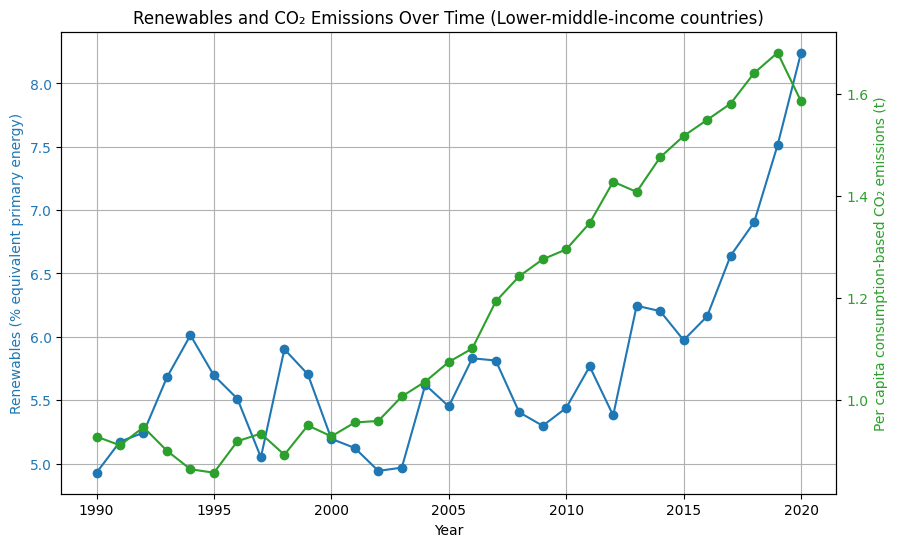

In [30]:
# Plot for lower middle income countries
renewables_lower_midle = renewables_df[(renewables_df['Entity'] == 'Lower-middle-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_lower_midle = co2_df[(co2_df['Entity'] == 'Lower-middle-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_lower_midle, co2_lower_midle, 'Lower-middle-income countries')

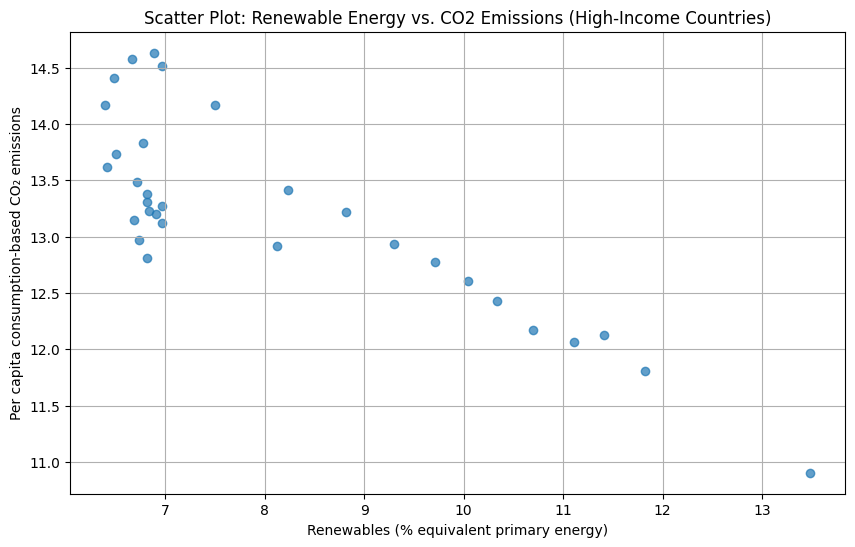

In [31]:
import matplotlib.pyplot as plt

# Scatter plot for high-income countries
plt.figure(figsize=(10, 6))
plt.scatter(renewables_high_income, co2_high_income, alpha=0.7)
plt.title('Scatter Plot: Renewable Energy vs. CO2 Emissions (High-Income Countries)')
plt.xlabel('Renewables (% equivalent primary energy)')
plt.ylabel('Per capita consumption-based CO₂ emissions')
plt.grid(True)
plt.show()

In [32]:
from scipy.stats import pearsonr

# Extract data for high-income countries
renewables_high_income = renewables_df[
    (renewables_df['Entity'] == 'High-income countries') & 
    (renewables_df['Year'] >= 1990) & 
    (renewables_df['Year'] <= 2020)
]['Renewables (% equivalent primary energy)'].tolist()

co2_high_income = co2_df[
    (co2_df['Entity'] == 'High-income countries') & 
    (co2_df['Year'] >= 1990) & 
    (co2_df['Year'] <= 2020)
]['Per capita consumption-based CO₂ emissions'].tolist()

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(renewables_high_income, co2_high_income)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.8373
P-value: 0.0000
The correlation is statistically significant.
There is a negative correlation.


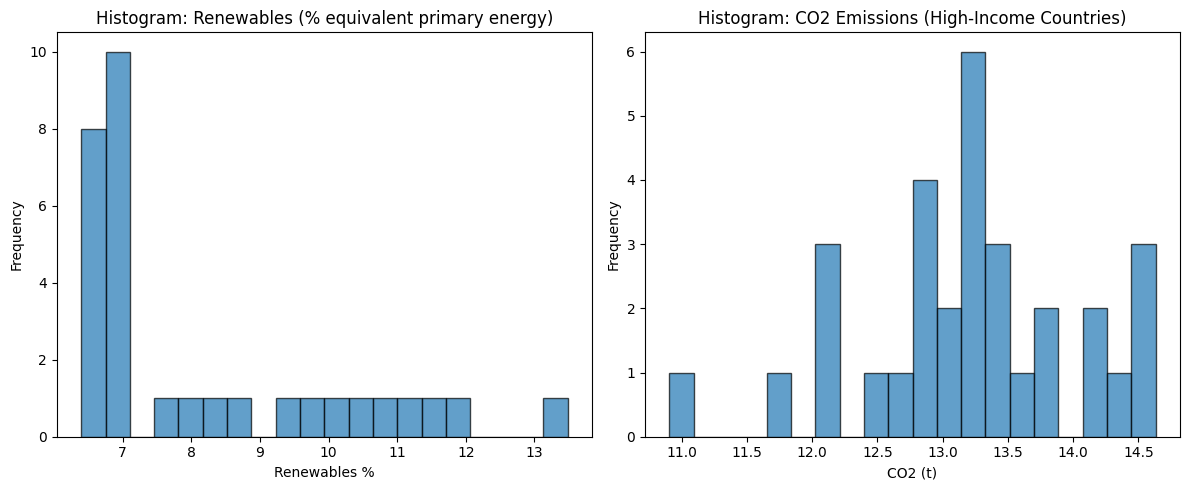

In [33]:
# Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(renewables_high_income, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram: Renewables (% equivalent primary energy)')
plt.xlabel('Renewables %')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(co2_high_income, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram: CO2 Emissions (High-Income Countries)')
plt.xlabel('CO2 (t)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import spearmanr

# Perform Spearman rank correlation test
correlation_coefficient, p_value = spearmanr(renewables_high_income, co2_high_income)

# Display results
print(f"Spearman Rank Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Spearman Rank Correlation Coefficient: -0.7577
P-value: 0.0000
The correlation is statistically significant.
There is a negative correlation.


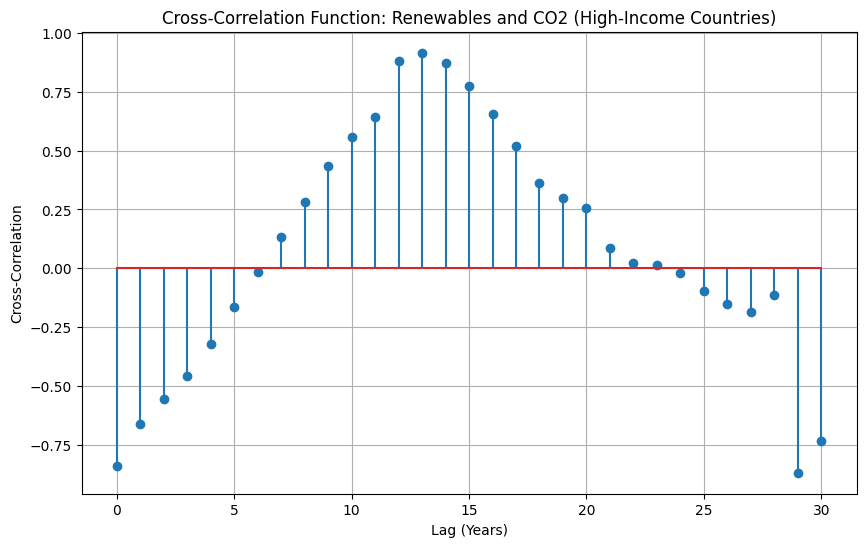

In [35]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with 'Year', 'Renewables', and 'CO2' columns
df_high_income = renewables_df[
    (renewables_df['Entity'] == 'High-income countries') & 
    (renewables_df['Year'] >= 1990) & 
    (renewables_df['Year'] <= 2020)
]

# Extract time series data
renewables_high_income = df_high_income['Renewables (% equivalent primary energy)']
co2_high_income = co2_df[
    (co2_df['Entity'] == 'High-income countries') & 
    (co2_df['Year'] >= 1990) & 
    (co2_df['Year'] <= 2020)
]['Per capita consumption-based CO₂ emissions']

# Perform cross-correlation analysis
cross_corr = ccf(renewables_high_income, co2_high_income)

# Plot cross-correlation function
plt.figure(figsize=(10, 6))
plt.stem(cross_corr)
plt.title('Cross-Correlation Function: Renewables and CO2 (High-Income Countries)')
plt.xlabel('Lag (Years)')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

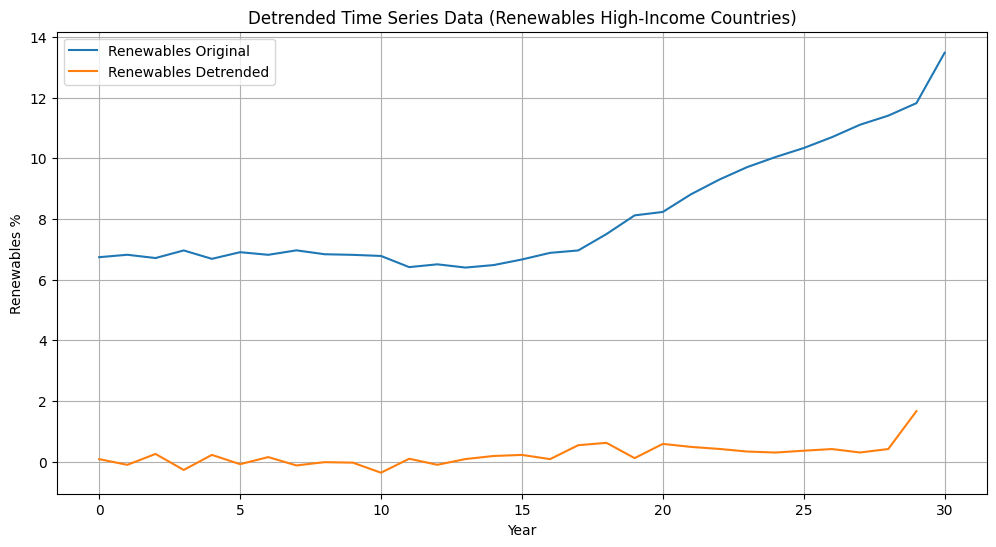

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with 'Year', 'Renewables', and 'CO2' columns
df_high_income = renewables_df[
    (renewables_df['Entity'] == 'High-income countries') & 
    (renewables_df['Year'] >= 1990) & 
    (renewables_df['Year'] <= 2020)
]

# Extract time series data
renewables_high_income = df_high_income['Renewables (% equivalent primary energy)'].tolist()

# Detrend using differencing
renewables_detrended = pd.Series(renewables_high_income).diff().dropna().tolist()

# Plot original and detrended data
plt.figure(figsize=(12, 6))
plt.plot(renewables_high_income, label='Renewables Original')
plt.plot(renewables_detrended, label='Renewables Detrended')
plt.title('Detrended Time Series Data (Renewables High-Income Countries)')
plt.xlabel('Year')
plt.ylabel('Renewables %')
plt.legend()
plt.grid(True)
plt.show()


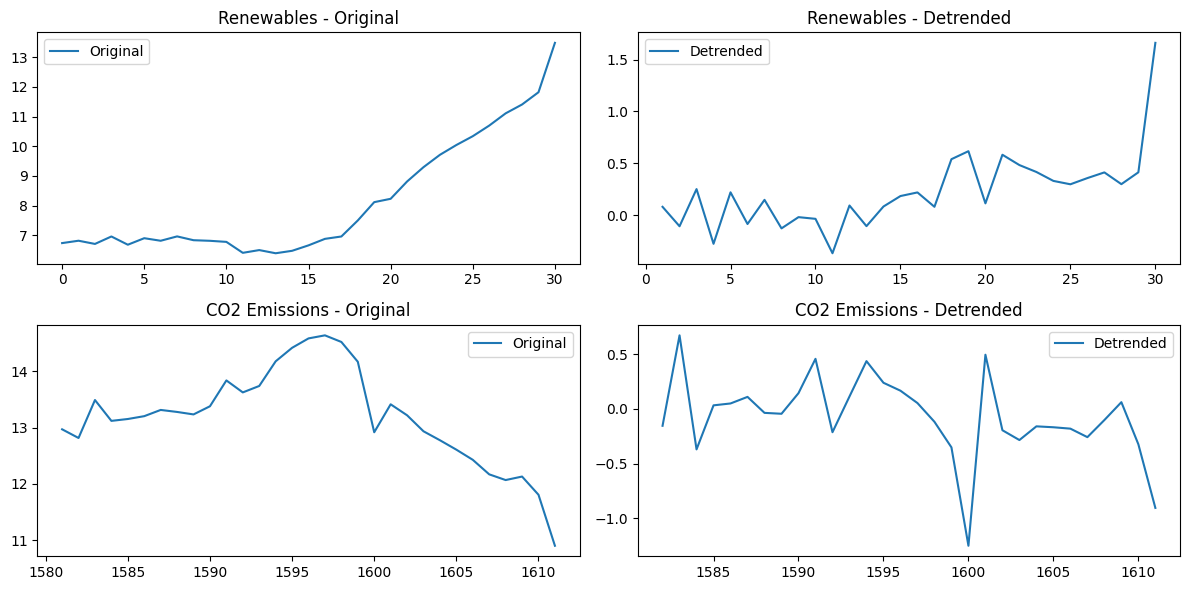

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Detrend renewables_high_income
renewables_high_income_detrended = pd.Series(renewables_high_income).diff().dropna()

# Detrend co2_high_income
co2_high_income_detrended = pd.Series(co2_high_income).diff().dropna()

# Plot the original and detrended time series for renewables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(renewables_high_income, label='Original')
plt.title('Renewables - Original')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(renewables_high_income_detrended, label='Detrended')
plt.title('Renewables - Detrended')
plt.legend()

# Plot the original and detrended time series for CO2
plt.subplot(2, 2, 3)
plt.plot(co2_high_income, label='Original')
plt.title('CO2 Emissions - Original')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(co2_high_income_detrended, label='Detrended')
plt.title('CO2 Emissions - Detrended')
plt.legend()

plt.tight_layout()
plt.show()



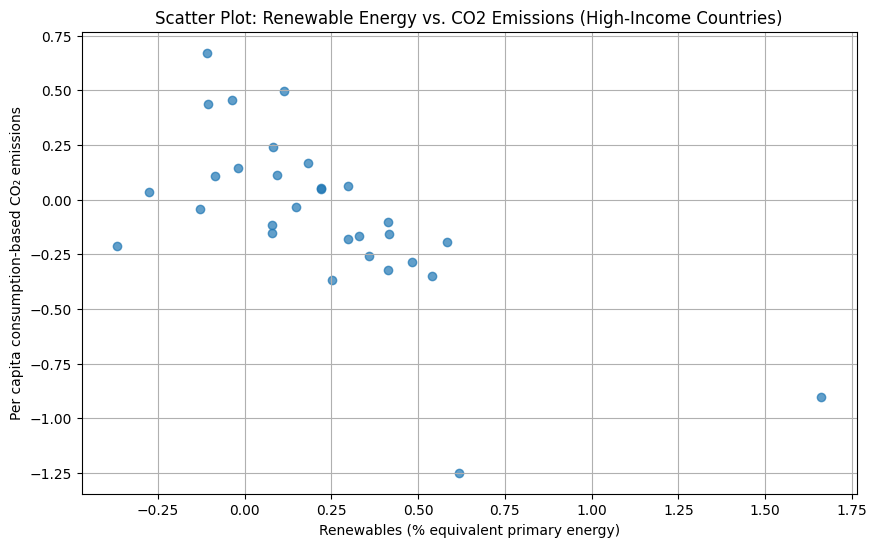

In [42]:
import matplotlib.pyplot as plt

# Scatter plot for high-income countries
plt.figure(figsize=(10, 6))
plt.scatter(renewables_high_income_detrended, co2_high_income_detrended, alpha=0.7)
plt.title('Scatter Plot: Renewable Energy vs. CO2 Emissions (High-Income Countries)')
plt.xlabel('Renewables (% equivalent primary energy)')
plt.ylabel('Per capita consumption-based CO₂ emissions')
plt.grid(True)
plt.show()

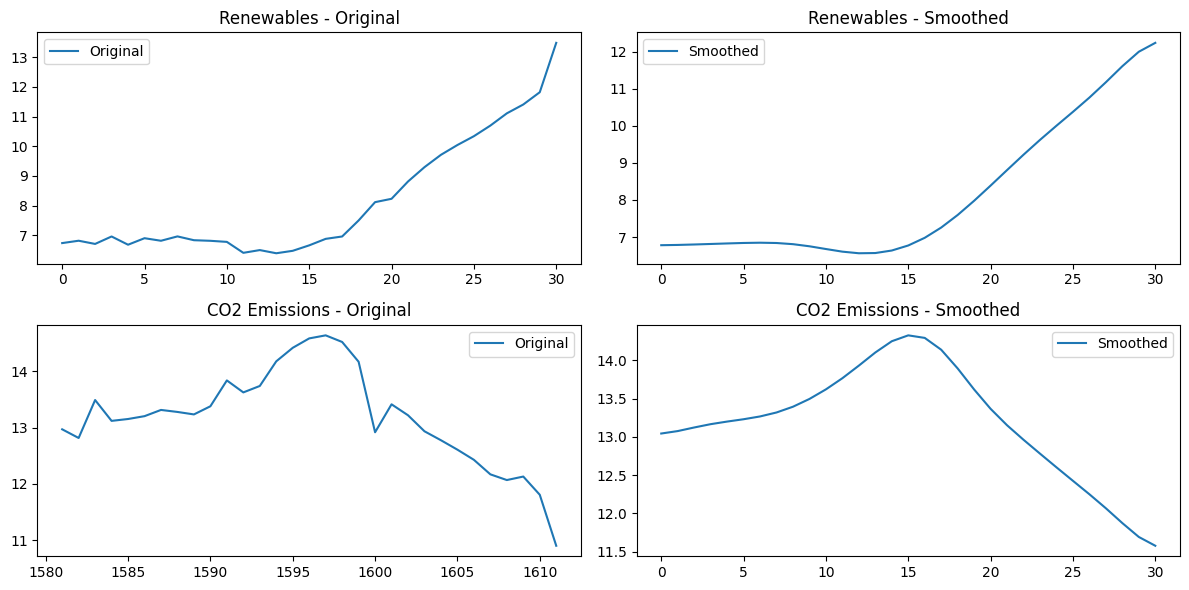

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Assuming you have the data loaded into pandas DataFrames named renewables_df and co2_df

# Define a function for Gaussian smoothing
def gaussian_smooth(data, sigma=2):
    return gaussian_filter1d(data, sigma=sigma)

# Apply Gaussian smoothing to renewables_high_income
renewables_high_income_smoothed = gaussian_smooth(renewables_high_income)

# Apply Gaussian smoothing to co2_high_income
co2_high_income_smoothed = gaussian_smooth(co2_high_income)

# Plot the original and smoothed time series for renewables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(renewables_high_income, label='Original')
plt.title('Renewables - Original')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(renewables_high_income_smoothed, label='Smoothed')
plt.title('Renewables - Smoothed')
plt.legend()

# Plot the original and smoothed time series for CO2
plt.subplot(2, 2, 3)
plt.plot(co2_high_income, label='Original')
plt.title('CO2 Emissions - Original')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(co2_high_income_smoothed, label='Smoothed')
plt.title('CO2 Emissions - Smoothed')
plt.legend()

plt.tight_layout()
plt.show()



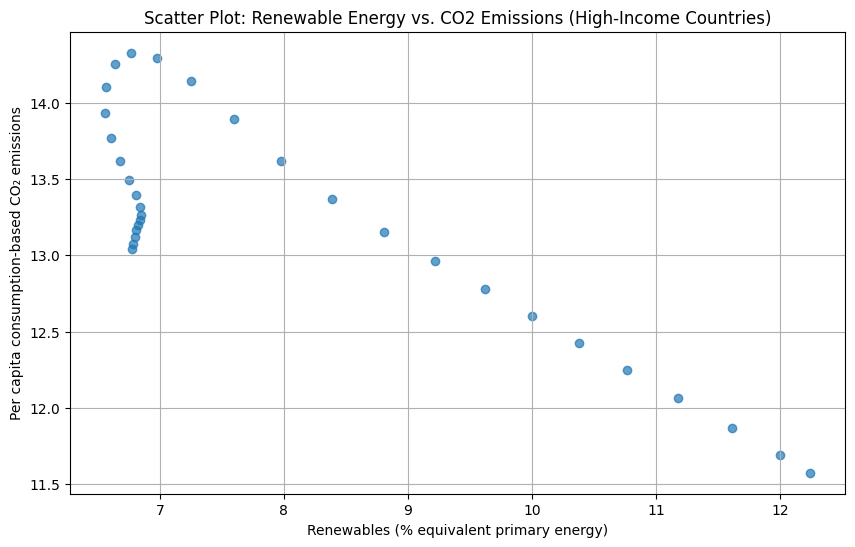

In [40]:
import matplotlib.pyplot as plt

# Scatter plot for high-income countries
plt.figure(figsize=(10, 6))
plt.scatter(renewables_high_income_smoothed, co2_high_income_smoothed, alpha=0.7)
plt.title('Scatter Plot: Renewable Energy vs. CO2 Emissions (High-Income Countries)')
plt.xlabel('Renewables (% equivalent primary energy)')
plt.ylabel('Per capita consumption-based CO₂ emissions')
plt.grid(True)
plt.show()

In [44]:
# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(renewables_high_income_detrended, co2_high_income_detrended)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.6698
P-value: 0.0001
The correlation is statistically significant.
There is a negative correlation.


In [45]:
# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(renewables_high_income_smoothed, co2_high_income_smoothed)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.8633
P-value: 0.0000
The correlation is statistically significant.
There is a negative correlation.


In [46]:
from scipy.stats import spearmanr

# Perform Spearman rank correlation test
correlation_coefficient, p_value = spearmanr(renewables_high_income_detrended, co2_high_income_detrended)

# Display results
print(f"Spearman Rank Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Spearman Rank Correlation Coefficient: -0.6538
P-value: 0.0001
The correlation is statistically significant.
There is a negative correlation.


In [47]:
from scipy.stats import spearmanr

# Perform Spearman rank correlation test
correlation_coefficient, p_value = spearmanr(renewables_high_income_smoothed, co2_high_income_smoothed)

# Display results
print(f"Spearman Rank Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a negative correlation.")
    else:
        print("The variables are perfectly correlated.")
else:
    print("The correlation is not statistically significant.")

Spearman Rank Correlation Coefficient: -0.7238
P-value: 0.0000
The correlation is statistically significant.
There is a negative correlation.
